# 1. Naive Bays Classification (Single Classifier)
## 1.1. Navie Bays classifier is a generative algorithm for classification and regression, so it has no training process and this property is smiliar to KNN;
## 1.2. Gaussian Naive Bayes is employed in this code, but lognormal, gamma, poisson distributions can be combined with Navie Bayes as well. The type of distribution fully depends on the problem to be solved. 
## 1.3. Data source: https://www.kaggle.com/uciml/pima-indians-diabetes-database;
## 1.4. Dataset size: 768 * 9, 768 rows of data, 9 features;
## 1.5. Data is splited with the certain ratio into train & test sets;
## 1.6. For each attribute, if different distribution is selected, the accuracy will be improved; 

# 2. Import packages

In [9]:
## dependencies & libraries
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import random
import math
import os

# 3. Data pre-process functions

In [10]:
## loading data from csv file
def load_data(file_name):
    route = os.getcwd()
    data_route = os.path.join(route, file_name)
    data=pd.read_csv(data_route)
    data_list = data.values.tolist()
    return data_list

## split data into model and test with certain ratio
def split_data_model_test(data, split_ratio):
    data_temp = data
    data_model_length = int(len(data_temp)*split_ratio)
    data_model=[]
    for single_data in range(data_model_length):
        index = random.randrange(len(data_temp))
        data_model.append(data_temp.pop(index))  
    data_test = data_temp
    return (data_model, data_test)

## split the model data into different classes within one map (dictionary)
def seperate_data(data_model):
    seperate={}
    for each_row in data_model:
        if each_row[-1] not in seperate:
            seperate[each_row[-1]]=[]
            seperate[each_row[-1]].append(each_row)
        else:
            seperate[each_row[-1]].append(each_row)
    return seperate



# 4. Bays theorem functions

In [52]:
## gaussian function
def Gaussian_calc(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

## calculate mean & std for each evidence in each class in the data_model
def class_evidence_stats(seperate_data):
    evidence_stats_class={}
    for each_class in seperate_data.keys():
        evidence_stats_class[each_class]=[ (st.mean(attr),st.stdev(attr)) for attr in zip(*seperate_data[each_class])]
    return evidence_stats_class

## calc probability of likelihood of evidence 
## P(X|Y)=P(x1|Y)*P(x2|Y)*P(x3|Y)*P(x1|Y)... based on the class for single-data
def calc_prob_likelihood_evidence(single_data_set, attr_mean_devi):
    prob_likelihood_evidence={}
    
    for single_class in attr_mean_devi:
            prob=1
            
            for index in range(len(attr_mean_devi[single_class])-1):
                mean = attr_mean_devi[single_class][index][0]
                devi = attr_mean_devi[single_class][index][1]
                prob*=Gaussian_calc(single_data_set[index], mean, devi)
            
            prob_likelihood_evidence[single_class]=prob
    return prob_likelihood_evidence

## calc prior P(Y)
def calc_prior(seperate, data_all):
    prior={}
    for key in seperate.keys():
        prior[key] = len(seperate[key])/len(data_all)
    
    return prior

## calc probability of evidence 
## P(X)=P(x1)*P(x2)*P(x3)*....
def calc_prob_evidence(single_data_set, data_source):
    data_source_mean_devi = [(st.mean(evidence), st.stdev(evidence)) for evidence in zip(*data_source)]
    
    prob_evidence=1
    for index in range(len(data_source_mean_devi)-1):
        mean= data_source_mean_devi[index][0]
        devi= data_source_mean_devi[index][1]
        prob_evidence*= Gaussian_calc(single_data_set[index], mean, devi)
    
    return prob_evidence

In [73]:
## gaussian function
def Gaussian_calc(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return exponent
    

res = Gaussian_calc(0.7, 0.488, 0.19) 
res

0.5366049722650822

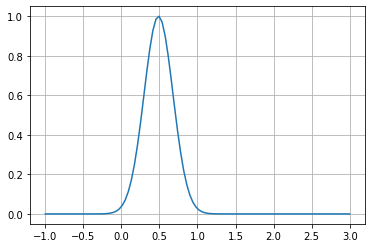

In [74]:
x= np.linspace(-1,3,100).tolist()
y = [ Gaussian_calc(val, 0.488, 0.19) for val in x]
plt.plot(x,y)
plt.grid()
plt.show()

In [72]:
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
	exponent = math.exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent
 
# Test Gaussian PDF
print(calculate_probability(0.7, 0.488, 0.19))
print(calculate_probability(2.0, 1.0, 1.0))
print(calculate_probability(0.0, 1.0, 1.0))

1.126707427948313
0.24197072451914337
0.24197072451914337


# 5. Implement & Test Naive Bays Classifier

In [75]:
## implement the algorithm
file_name='diabetes_data.csv'
data_source = load_data(file_name)
data_process = load_data(file_name)
split_ratio=0.8
data_model, data_test= split_data_model_test(data_process,split_ratio)

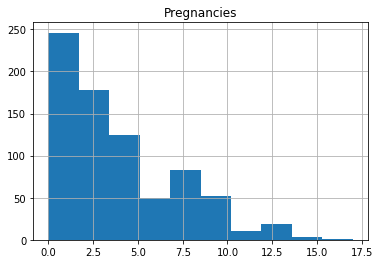

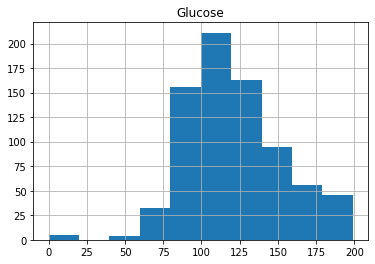

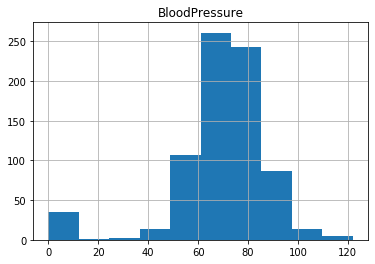

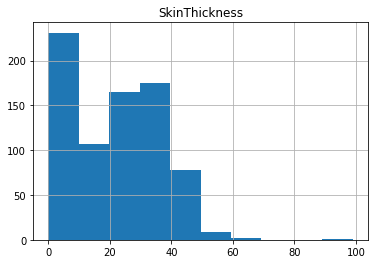

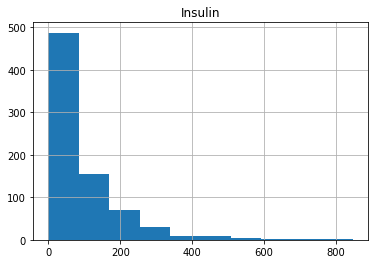

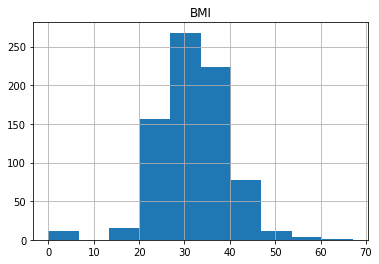

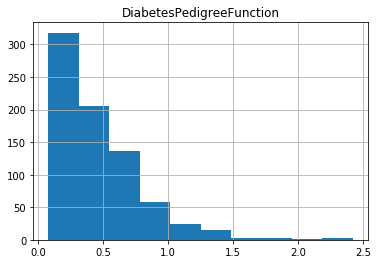

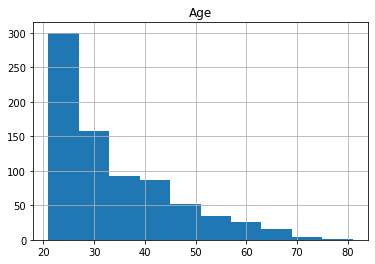

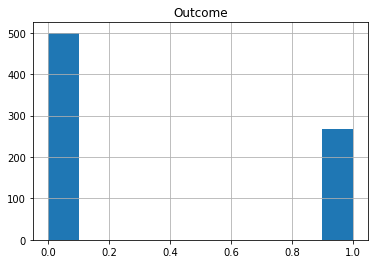

In [76]:
## plot histogram of each attribute
attr_lst = list(zip(*data_source))
attr_index=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI',
            'DiabetesPedigreeFunction','Age','Outcome']
for index in range(len(attr_index)):
    #bin_range = (min(attr_lst[index]),max(attr_lst[index]))
    plt.hist(attr_lst[index],bins=10,align='mid')
    plt.title(attr_index[index])
    plt.grid()
    plt.show()

In [77]:
## Test the algorithm 
# define error counter
error=0
error_list=[]
    
# put data_model into a dictionary
seperate = seperate_data(data_model)

# calc mean & deviation of normal distribution of each attribute (8 attribute cols + 1 target col) of data_model
attr_mean_devi = class_evidence_stats(seperate)

## Naive Bays Classifier
for index in range(len(data_test)):

    # single data
    data_single = data_test[index]    

    # calc probability of likelihood of each evidence of single data intput
    # P(X|Y)
    prob_likelihood_evidence = calc_prob_likelihood_evidence(data_single, attr_mean_devi)

    # calc prior P(Y)
    prior = calc_prior(seperate, data_source)

    # calc probability of each evidence
    # P(X) is same for both class, so it can be ignored
    #prob_evidence = calc_prob_evidence(data_single, data_source)

    # calc probability of each class based on the data_single input
    class_single_res={}
    for class_index in prob_likelihood_evidence:
                class_single_res[prob_likelihood_evidence[class_index]*prior[class_index]]=class_index

    # sort the dictionary with keys
    sort_ls = sorted(class_single_res.keys(), reverse=True)
    
    # append classification result into the data_test dataset
    # it's easy to see the result
    res = class_single_res[sort_ls[0]]  
    data_test[index].append(res)
    
    # count the error 
    if data_test[index][-2] != data_test[index][-1]:
        error+=1
        error_list.append(data_test[index])

error_rate = error/len(data_test)
class_res = data_test

In [78]:
print('total data size:',len(data_source),'\ndata test size:', len(data_test),'\ndata model size:', len(data_model))
print("error rate: ", (1-error_rate)*100);

total data size: 768 
data test size: 154 
data model size: 614
error rate:  77.92207792207793
